In [1]:
from sklearn.mixture import GMM
from sklearn import mixture
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
import itertools
import matplotlib as mpl
from sklearn.metrics import accuracy_score

%matplotlib inline

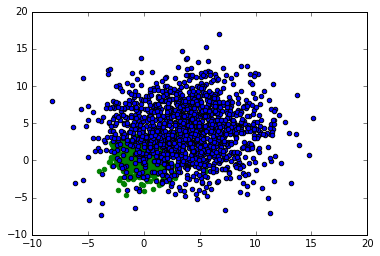

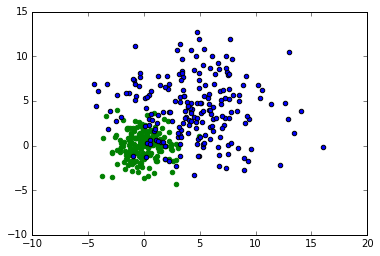

In [2]:
v = 4

middle_f = (0,0)
cov_matrix_f = np.array(([v / 2, 0 ], [0, v/2]))
firstSet =  np.random.multivariate_normal(middle_f, cov_matrix_f, 500)
firstSetTest =  np.random.multivariate_normal(middle_f, cov_matrix_f, 200)


middle_s = (v, v)
cov_matrix_s = np.array(([3*v, 0 ], [0, 3*v]))
secondSet = np.random.multivariate_normal(middle_s, cov_matrix_s, 1500)
secondSetTest = np.random.multivariate_normal(middle_s, cov_matrix_s, 200)

plt.scatter(firstSet[:, 0],  firstSet[:, 1],color = 'green')
plt.scatter(secondSet[:, 0],  secondSet[:, 1])
plt.show()

x_train = np.concatenate((firstSet, secondSet))
y_train = np.concatenate([np.zeros((500)), np.ones((500))]).astype('int')

x_test = np.concatenate( [ firstSetTest, secondSetTest] )
y_test = np.concatenate([np.zeros((200)), np.ones((200))]).astype('int')

plt.scatter(firstSetTest[:, 0],  firstSetTest[:, 1],color = 'green')
plt.scatter(secondSetTest[:, 0],  secondSetTest[:, 1])
plt.show()

In [3]:
clf = mixture.GMM(n_components=2, covariance_type='tied')
y_train = np.concatenate([np.ones((500)), np.zeros((500))]).astype('int')


clf.fit(x_train, y_train)
print clf.means_


[[ 0.94765783  1.38034408]
 [ 5.51982793  5.32725219]]


In [4]:
Y_ = clf.predict(x_test)
print y_test
print Y_
print accuracy_score(y_test, Y_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

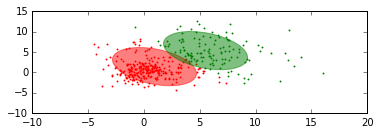

In [5]:
color_iter = itertools.cycle(['r', 'g', 'm', 'b', 'r'])
splot = plt.subplot(2, 1, 1)
for i, (mean, covar, color) in enumerate(zip(
        clf.means_, clf._get_covars(), color_iter)):
    
    
    v, w = linalg.eigh(covar)
    u = w[0] / linalg.norm(w[0])

    if not np.any(Y_ == i):
            continue
        
    plt.scatter(x_test[Y_ == i, 0], x_test[Y_ == i, 1], .8, color=color)

    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

#plt.xlim(-50, 100)
#plt.ylim(-30, 80)
#plt.xticks(())
#plt.yticks(())
#plt.title(title)

plt.show()

# UBM - model. Correct

In [6]:
print clf.means_

[[ 0.94765783  1.38034408]
 [ 5.51982793  5.32725219]]


In [29]:

adapted_gmm = mixture.GMM(n_components=2, covariance_type='tied', n_iter=1)
adapted_gmm.means_ = clf.means_
adapted_gmm.covars_ = clf.covars_
adapted_gmm.weights_ = clf.weights_
adapted_gmm.fit(x_train)

T = x_train.shape[0]

relevance_factor = 16

n_i = adapted_gmm.weights_*T
alpha_i = n_i/(n_i+relevance_factor)
adapted_gmm.means_[np.isnan(adapted_gmm.means_)] = 0.0
return_means = (alpha_i*adapted_gmm.means_.T+(1-alpha_i)*(clf.means_).T).T

In [30]:
print return_means

[[ 1.34774295  1.52485394]
 [ 4.56105603  4.72472125]]


In [31]:
clf.means_ = return_means

new_predict = clf.predict(x_test)
print y_test
print new_predict
print accuracy_score(y_test, new_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

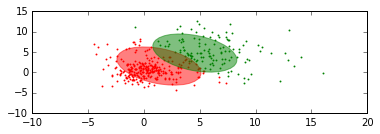

In [32]:
color_iter = itertools.cycle(['r', 'g', 'm', 'b', 'r'])
splot = plt.subplot(2, 1, 1)
for i, (mean, covar, color) in enumerate(zip(
        clf.means_, clf._get_covars(), color_iter)):
    
    v, w = linalg.eigh(covar)
    u = w[0] / linalg.norm(w[0])

    if not np.any(Y_ == i):
            continue
        
    plt.scatter(x_test[Y_ == i, 0], x_test[Y_ == i, 1], .8, color=color)

    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi 
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.show()